# Initial Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data
Only need to run once

In [2]:
from google.colab import files
uploaded = files.upload()

Saving DrugReviewCleaned to DrugReviewCleaned


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

# Look at Data

In [0]:
# If just uploading files:
data1 = pd.read_csv('drugsComTest_raw.tsv', delimiter = '\t', index_col = 'Unnamed: 0')
data2 = pd.read_csv('drugsComTrain_raw.tsv', delimiter = '\t', index_col = 'Unnamed: 0')
# If mounting drive:
# data1 = pd.read_csv('drive/My Drive/Colab Notebooks/drugsComTest_raw.tsv', delimiter = '\t', index_col = 'Unnamed: 0')
# data2 = pd.read_csv('drive/My Drive/Colab Notebooks/drugsComTrain_raw.tsv', delimiter = '\t', index_col = 'Unnamed: 0')

# data is split for us 75%/25%

In [0]:
data1.head()

,drugName,condition,review,rating,date,usefulCount
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
data2.head()

,drugName,condition,review,rating,date,usefulCount
163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


## Merge Data

In [0]:
data = pd.concat([data1, data2], axis = 0)
data.head()
# not completely sure if we should use merged data. we should be able to do the preprocessing with merged data but not train using merged data?
# let me know if i'm wrong

,drugName,condition,review,rating,date,usefulCount
206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [0]:
data.shape, data1.shape, data2.shape, data1.shape[0]+data2.shape[0] #((215063, 6), (161297, 6), (53766, 6), 215063)

((215063, 6), (161297, 6), (53766, 6), 215063)

In [0]:
import seaborn as sns

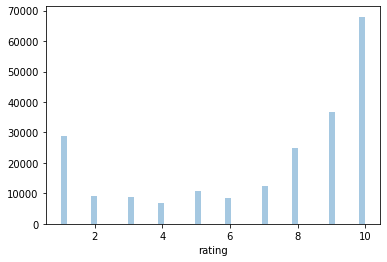

In [0]:
sns.distplot(data.rating, kde = False)

# Testing on one sample

In [0]:
a = data['review'][0]
a

'"Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn&#039;t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it&#039;s almost November! I&#039;m sick of bleeding and forking out money for sanitary pads when I shouldn&#039;t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won&#039;t let me :("'

In [0]:
a.count('&#039;')

5

In [0]:
a = a.replace('&#039;', "'")
a

'"Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn\'t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it\'s almost November! I\'m sick of bleeding and forking out money for sanitary pads when I shouldn\'t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won\'t let me :("'

In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
word_tokenize(a), len(word_tokenize(a))

# Cleaning all data now instead of just one

## Making all \&#039; to '

In [0]:
data = data[['review', 'rating']]
data

,review,rating
206461,"""It has no side effect, I take it in combinati...",9.0
95260,"""My son is halfway through his fourth week of ...",8.0
92703,"""I used to take another oral contraceptive, wh...",5.0
138000,"""This is my first time using any form of birth...",8.0
35696,"""Suboxone has completely turned my life around...",9.0
...,...,...
159999,"""I have taken Tamoxifen for 5 years. Side effe...",10.0
140714,"""I&#039;ve been taking Lexapro (escitaploprgra...",9.0
130945,"""I&#039;m married, 34 years old and I have no ...",8.0
47656,"""I was prescribed Nucynta for severe neck/shou...",1.0


In [0]:
data['review'][0]

'"Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn&#039;t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it&#039;s almost November! I&#039;m sick of bleeding and forking out money for sanitary pads when I shouldn&#039;t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won&#039;t let me :("'

In [0]:
data['review'] = data['review'].apply(lambda x: x.replace("&#039;", "'"))
data['review'][0]

'"Been on the depo injection since January 2015, had bleeding but it stopped after a while. When I had another injection in June, I didn\'t bleed for about a month. Started spotting mid-July and since approx. August 1st, I have been bleeding constantly, heavy enough to use pads and now it\'s almost November! I\'m sick of bleeding and forking out money for sanitary pads when I shouldn\'t be bleeding-well not as long as I have been now! Currently awaiting an ultrasound to see what is happening. I would like to change my contraceptive but my doctor won\'t let me :("'

## Things to remove: stopwords and punctuation ;; 
keras.preprocessing.text.Tokenizer actually splits by spaces (won't need to worry about contractions like didn't), removes punctuation, lowercases everything, and lets you choose the number of words to keep
BUT it doesn't remove stop words NOR lemmatizes words

In [0]:
from nltk.corpus import stopwords

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
remove_list = stopwords.words('english')
remove_list[:5] # all lowercase already

['i', 'me', 'my', 'myself', 'we']

In [0]:
import string

In [0]:
remove_list += string.punctuation
type(remove_list), remove_list[-5:]

(list, ['`', '{', '|', '}', '~'])

### Tokenize before removing

In [0]:
from nltk.tokenize import word_tokenize, TweetTokenizer
# word_tokenize would split "didn't" to "did" and "n't" but TweetTokenizer would keep it "didn't"

In [0]:
twt_tokenizer = TweetTokenizer()
data['review'] = data['review'].apply(lambda x: twt_tokenizer.tokenize(x))
data['review'][0]

### Lowercase before removing

In [0]:
def lower_it(list_of_str):
  return [word.lower() for word in list_of_str]

In [0]:
# test
lower_it(["This", "WILL", "Be", "Lowercased", ":)"])

['this', 'will', 'be', 'lowercased', ':)']

In [0]:
data['review'] = data['review'].apply(lower_it)

In [0]:
data['review'][0][:7]

['"', 'been', 'on', 'the', 'depo', 'injection', 'since']

### Remove

In [0]:
def remove_stops(list_of_str):
  return [word for word in list_of_str if word not in remove_list]

In [0]:
# test
remove_stops(["this", "didn't", "break", "before", "because", "i", "said", "no", ":("])

['break', 'said', ':(']

In [0]:
data['review'] = data['review'].apply(remove_stops)

In [0]:
data['review'][0][:7]

['depo', 'injection', 'since', 'january', '2015', 'bleeding', 'stopped']

### Lemmatize

In [0]:
from nltk.stem import WordNetLemmatizer

In [0]:
from nltk.corpus import wordnet

In [0]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
lemmatizer = WordNetLemmatizer()

In [0]:
thedict = {'a':1}


NoneType

In [0]:
def lemma_list(list_of_str):
  
  words_pos = nltk.pos_tag(list_of_str) # list of tuples: [('word1', POS1), ('word2', POS2) ... ]
  
  # need tag_dict because WordNetLemmatizer().lemmatize(word, pos) does not take in things like "NNP" for proper noun in pos, need to make it "n":
  tag_dict = {"J": wordnet.ADJ,
              "N": wordnet.NOUN,
              "V": wordnet.VERB,
              "R": wordnet.ADV}
  
  word_pos_conv = [(word, tag_dict.get(pos[0])) for word, pos in words_pos] # words, pos converted; None if not J, N, V, or R
  
  return_list = [WordNetLemmatizer().lemmatize(i[0], pos = i[1]) if i[1] != None else WordNetLemmatizer().lemmatize(i[0]) for i in word_pos_conv]

  return return_list

In [0]:
# test
lemma_list(["will", "this", "work", "well", "here", "?", "not", "sure", "he", "ran", "jumped", "and", "flew"])

['will',
 'this',
 'work',
 'well',
 'here',
 '?',
 'not',
 'sure',
 'he',
 'run',
 'jumped',
 'and',
 'fly']

In [0]:
data['review'] = data['review'].apply(lemma_list)
data['review'][0]

['depo',
 'injection',
 'since',
 'january',
 '2015',
 'bleeding',
 'stop',
 'another',
 'injection',
 'june',
 'bleed',
 'month',
 'start',
 'spot',
 'mid-july',
 'since',
 'approx',
 'august',
 '1st',
 'bleed',
 'constantly',
 'heavy',
 'enough',
 'use',
 'pad',
 'almost',
 'november',
 "i'm",
 'sick',
 'bleed',
 'fork',
 'money',
 'sanitary',
 'pad',
 'bleeding-well',
 'long',
 'currently',
 'await',
 'ultrasound',
 'see',
 'happen',
 'would',
 'like',
 'change',
 'contraceptive',
 'doctor',
 'let',
 ':(']

# Pickle data (frame)

In [0]:
import pickle

In [0]:
# with open("DrugReviewCleaned", "wb") as output_file:
#   pickle.dump(data, output_file)

In [0]:
with open("DrugReviewCleaned", "rb") as input_file:
  data = pickle.load(input_file)

# Merging back bag of words for each review into a single string to input into Tokenizer

In [0]:
# before
data['review'][0]

['depo',
 'injection',
 'since',
 'january',
 '2015',
 'bleeding',
 'stop',
 'another',
 'injection',
 'june',
 'bleed',
 'month',
 'start',
 'spot',
 'mid-july',
 'since',
 'approx',
 'august',
 '1st',
 'bleed',
 'constantly',
 'heavy',
 'enough',
 'use',
 'pad',
 'almost',
 'november',
 "i'm",
 'sick',
 'bleed',
 'fork',
 'money',
 'sanitary',
 'pad',
 'bleeding-well',
 'long',
 'currently',
 'await',
 'ultrasound',
 'see',
 'happen',
 'would',
 'like',
 'change',
 'contraceptive',
 'doctor',
 'let',
 ':(']

In [5]:
# after ; join the strings back so we can do keras.preprocessing.text.Tokenizer().text_to_matrix and get matrix of counts/freq/tfidf back
data['review'] = data['review'].apply(lambda x: ' '.join(x))
data['review'][0]

"depo injection since january 2015 bleeding stop another injection june bleed month start spot mid-july since approx august 1st bleed constantly heavy enough use pad almost november i'm sick bleed fork money sanitary pad bleeding-well long currently await ultrasound see happen would like change contraceptive doctor let :("

# Formatting inputs and outputs

In [6]:
from keras.preprocessing.text import Tokenizer # not gonna use this as much to clean, more for formatting since cleaning was done above

Using TensorFlow backend.


## Checking to see what we want
Do we want sequences? : [[1], [3], [1], [4], [5], [2], [6], [1], [2]]

or a matrix: 

array([[0.        , 0.33333333, 0.22222222, 0.11111111, 0.11111111,
        0.11111111, 0.11111111]])
note: matrices will have first column/value = 0


And matrix based on frequency, having it/not (0 or 1), tf-idf?

In [0]:
kToken = Tokenizer()

In [0]:
kToken.fit_on_texts(["this", "is", "this", "string", "but", "for", "testing", "this", "for"])

In [0]:
sequences = kToken.texts_to_sequences(["this", "is", "this", "string", "but", "for", "testing", "this", "for"])

In [0]:
sequences

[[1], [3], [1], [4], [5], [2], [6], [1], [2]]

In [0]:
kToken.word_index

{'but': 5, 'for': 2, 'is': 3, 'string': 4, 'testing': 6, 'this': 1}

In [0]:
ohe = kToken.texts_to_matrix([["this", "is", "this", "string", "but", "for", "testing", "this", "for"], ["this", "is", "testing", "this"]], mode = 'count')

In [0]:
ohe

array([[0., 3., 2., 1., 1., 1., 1.],
       [0., 2., 0., 1., 0., 0., 1.]])

### We probably want count/frequency or tf-idf; freq is just count/total in that list
Just don't do binary because it doesn't give us as much information. Should probably test all

## Make inputs and output into an acceptable format (count-matrices for inputs, ohe the outputs)

### Inputs [1]

In [0]:
kToken = Tokenizer(num_words = 2500)

In [0]:
# fit on texts
kToken.fit_on_texts(data['review'])

In [0]:
# text to matrix
input_matrix = kToken.texts_to_matrix(data['review'], mode = 'count')


In [10]:
input_matrix.shape # 215063, num_words = 5000

(215063, 2500)

In [0]:
# there are 49,319 tokens in all 215,063 reviews; first column is 0;

In [0]:
################################################################

In [0]:
# for later to find the most commonly used words
sequences = kToken.texts_to_sequences(data['review'])

[12, 10, 1, 637, 2433, 41, 65, 2888, 1232]

In [0]:
len(sequences[0]), len(sequences[1]) 

(9, 64)

In [0]:
decoder = kToken.word_index
len(decoder)

49319

In [0]:
####################################################################

### Inputs [2]

In [0]:
kToken = Tokenizer(num_words = 5000)

In [0]:
# fit on texts
kToken.fit_on_texts(data['review'])

In [0]:
# text to matrix
input_matrix = kToken.texts_to_matrix(data['review'], mode = 'tfidf')


### Outputs

In [0]:
import pandas as pd

In [12]:
outputs = pd.get_dummies(data['rating']).reset_index(drop = True)
outputs.shape # 215063, 10 for now, without binning

(215063, 10)

### Binning

In [47]:
data.columns

Index(['review', 'rating'], dtype='object')

In [51]:
cond_list = [data['rating'] < 4, 
             data['rating'] < 8, 
             data['rating'] <= 10] # 1,2,3 -> 1 ; 4,5,6,7 -> 2 ; 8,9,10 -> 3
choice_list = [1, 2, 3]
data['binned_rating'] = np.select(condlist = cond_list, choicelist = choice_list)
data['binned_rating'].value_counts(), data['rating'].value_counts().sort_index(ascending = False) # check values all add up correctly

(3    129759
 1     46901
 2     38403
 Name: binned_rating, dtype: int64, 10.0    68005
 9.0     36708
 8.0     25046
 7.0     12547
 6.0      8462
 5.0     10723
 4.0      6671
 3.0      8718
 2.0      9265
 1.0     28918
 Name: rating, dtype: int64)

### Binned outputs

In [52]:
binned_outputs = pd.get_dummies(data['binned_rating']).reset_index(drop = True)
binned_outputs.shape # 215063, 3

(215063, 3)

In [0]:
binned_outputs = np.array(binned_outputs)

### Split data

In [0]:
type(input_matrix) # should make outputs an ndarray also

numpy.ndarray

In [0]:
outputs = np.array(outputs) # making outputs an ndarray

In [14]:
train_size = round(.75*input_matrix.shape[0])
train_size # 161297

(161297, 53766, 215063)

In [0]:
import random

In [16]:
grab_these_train = random.sample(range(1, input_matrix.shape[0]), k = train_size) # picks k unique random elements from sample
grab_these_train[:5]

[41380, 162104, 84029, 25407, 117610]

In [0]:
train_input = input_matrix[grab_these_train]
test_input = np.delete(input_matrix, grab_these_train, axis = 0)

train_output = outputs[grab_these_train]
test_output = np.delete(outputs, grab_these_train, axis = 0)

In [18]:
train_input.shape, train_output.shape, test_input.shape, test_output.shape # ((161297, 5000), (161297, 10), (53766, 5000), (53766, 10))

((161297, 2500), (161297, 10), (53766, 2500), (53766, 10))

In [0]:
# for binned outputs:

In [0]:
import random

grab_these_train = random.sample(range(1, input_matrix.shape[0]), k = train_size) # picks k unique random elements from sample
grab_these_train[:5]

train_input = input_matrix[grab_these_train]
test_input = np.delete(input_matrix, grab_these_train, axis = 0)

train_output = binned_outputs[grab_these_train]
test_output = np.delete(binned_outputs, grab_these_train, axis = 0)

# Creating the model

In [0]:
from keras import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units = 150, activation = 'linear', input_shape = (5000,))) # https://keras.io/activations/
model.add(Dense(units = 75, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [0]:
model.compile(optimizer = 'SGD', # https://keras.io/optimizers/
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [44]:
trained_mod = model.fit(x = train_input,
                        y = train_output,
                        batch_size = round(train_input.shape[0]/3),
                        epochs = 35,
                        verbose = 1)
# 5000 most common words by count, train acc = 0.3163, 
# adding another layer did not help, first activation relu -> linear did not help (as expected)
# second activation relu -> exponential did not help

# 5000 most common words by tfidf, train acc = 0.2639

# 2500 most common words by count, train acc = 0.3167

Epoch 1/35
161297/161297 [==============================] - 4s 25us/step - loss: 2.2324 - acc: 0.2178
Epoch 2/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2284 - acc: 0.2428
Epoch 3/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2245 - acc: 0.2632
Epoch 4/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2205 - acc: 0.2802
Epoch 5/35
161297/161297 [==============================] - 4s 25us/step - loss: 2.2167 - acc: 0.2930
Epoch 6/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2128 - acc: 0.3030
Epoch 7/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2090 - acc: 0.3090
Epoch 8/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2053 - acc: 0.3123
Epoch 9/35
161297/161297 [==============================] - 4s 22us/step - loss: 2.2015 - acc: 0.3146
Epoch 10/35
161297/161297 [==============================] - 4s 22us/step - loss: 

In [0]:
first_preds = model.predict(test_input)

In [46]:
model.evaluate(test_input, test_output)

# 5000 most common by count, test acc = 0.31873302830896116 with 10 epochs, 0.31603615667949636 with 20 epochs, 0.31603615667949636 with 25
# 5000 most common by tfidf, test acc = 0.3145668266196072 with 35 epochs

# 2500 most common by count, test acc = 0.3145668266196072 with 35 epochs

53766/53766 [==============================] - 3s 53us/step


[2.1214806450507258, 0.3145668266196072]

In [0]:
data['rating'].value_counts(normalize = True).sort_index(ascending = False)

10.0    0.316210
9.0     0.170685
8.0     0.116459
7.0     0.058341
6.0     0.039347
5.0     0.049860
4.0     0.031019
3.0     0.040537
2.0     0.043080
1.0     0.134463
Name: rating, dtype: float64

In [30]:
first_preds[:10]

array([[0.11441886, 0.06366932, 0.08143107, 0.06767189, 0.08838321,
        0.0834289 , 0.09216303, 0.09217538, 0.11745916, 0.19919915],
       [0.11767954, 0.05678561, 0.07789585, 0.06502455, 0.08631671,
        0.0782707 , 0.09291974, 0.08794307, 0.1214708 , 0.21569347],
       [0.11503238, 0.06278246, 0.0824286 , 0.06703684, 0.08680184,
        0.08372429, 0.09111775, 0.09311291, 0.1166238 , 0.20133913],
       [0.11376171, 0.05745225, 0.07909165, 0.06301744, 0.08720892,
        0.08657054, 0.08721355, 0.09748223, 0.11817972, 0.21002191],
       [0.11880101, 0.0382544 , 0.07577224, 0.05234138, 0.07813098,
        0.08038432, 0.08063058, 0.08725923, 0.11353891, 0.274887  ],
       [0.11465237, 0.05382126, 0.07418919, 0.06296764, 0.08755852,
        0.08398012, 0.09020371, 0.09519538, 0.12365792, 0.21377386],
       [0.11542429, 0.0517186 , 0.07677797, 0.05833614, 0.08703785,
        0.08478747, 0.08415153, 0.09359308, 0.11757223, 0.23060079],
       [0.1176017 , 0.06303667, 0.0801095

# Model with binned ratings

In [0]:
from keras import Sequential
from keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units = 150, activation = 'linear', input_shape = (5000,))) # https://keras.io/activations/
model.add(Dense(units = 75, activation = 'relu'))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 25, activation = 'relu'))
model.add(Dense(units = 15, activation = 'relu'))
model.add(Dense(units = 3, activation = 'softmax'))

In [0]:
model.compile(optimizer = 'SGD', # https://keras.io/optimizers/
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [80]:
trained_mod = model.fit(x = train_input,
                        y = train_output,
                        batch_size = round(train_input.shape[0]/3),
                        epochs = 35,
                        verbose = 1)


Epoch 1/35
161297/161297 [==============================] - 7s 42us/step - loss: 1.0361 - acc: 0.5637
Epoch 2/35
161297/161297 [==============================] - 5s 29us/step - loss: 1.0288 - acc: 0.5796
Epoch 3/35
161297/161297 [==============================] - 4s 26us/step - loss: 1.0217 - acc: 0.5893
Epoch 4/35
161297/161297 [==============================] - 4s 27us/step - loss: 1.0149 - acc: 0.5951
Epoch 5/35
161297/161297 [==============================] - 4s 26us/step - loss: 1.0085 - acc: 0.5985
Epoch 6/35
161297/161297 [==============================] - 4s 26us/step - loss: 1.0024 - acc: 0.6005
Epoch 7/35
161297/161297 [==============================] - 4s 25us/step - loss: 0.9966 - acc: 0.6015
Epoch 8/35
161297/161297 [==============================] - 4s 25us/step - loss: 0.9913 - acc: 0.6021
Epoch 9/35
161297/161297 [==============================] - 4s 26us/step - loss: 0.9864 - acc: 0.6026
Epoch 10/35
161297/161297 [==============================] - 4s 27us/step - loss: 

In [0]:
first_preds = model.predict(test_input)

In [82]:
model.evaluate(test_input, test_output) # 0.6046200200892611

53766/53766 [==============================] - 4s 72us/step


[0.9402236783694721, 0.6046200200892611]

In [68]:
data['binned_rating'].value_counts(normalize = True).sort_index(ascending = False)

3    0.603353
2    0.178566
1    0.218080
Name: binned_rating, dtype: float64

In [84]:
first_preds[0]

array([0.2208329 , 0.21620464, 0.5629625 ], dtype=float32)